In [27]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("white_wine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [29]:
#berikan label 1 untuk yang quality > 6, else label 0
df['quality'] = np.where(df['quality']>6.0, 1,0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [30]:
data_classification = df[['density','alcohol','quality']].copy()
data_classification.dropna(inplace=True)
data_classification.head()

,density,alcohol,quality
0,1.0010,8.8,0
1,0.9940,9.5,0
2,0.9951,10.1,0
3,0.9956,9.9,0
4,0.9956,9.9,0


In [31]:
#get numerical summary dari label

#data_classification[data_classification['quality']==0] --> ngefilter data yang quality = 0
#data_classification[data_classification['quality']==0]['quality'] --> filter yg quality = 0 dan ambil kolom quality saja

jumlah_label_0 = data_classification[data_classification['quality']==0]['quality'].count()
jumlah_label_1 = data_classification[data_classification['quality']==1]['quality'].count()
jumlah_data = data_classification['quality'].count()

print(f"Jumlah persentase data per-kelas, adalah: {jumlah_label_0/jumlah_data} untuk kelas 0, dan {jumlah_label_1/jumlah_data} untuk kelas 1")

Jumlah persentase data per-kelas, adalah: 0.8111753371868978 untuk kelas 0, dan 0.18882466281310212 untuk kelas 1


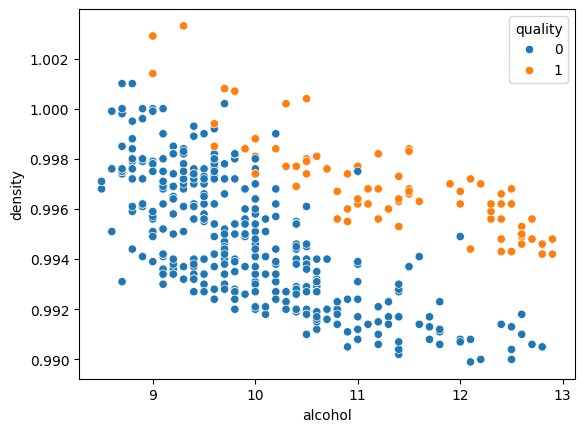

In [32]:
#get graphical summary

sns.scatterplot(
    data = data_classification,
    x = 'alcohol', 
    y = 'density', 
    hue = 'quality'
)
plt.show()

Section 1: Model Improvement with Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [34]:
X = data_classification[['alcohol', 'density']].copy()
y = data_classification['quality'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

In [35]:
logreg_model = LogisticRegression().fit(X = X_train, y = y_train)

In [36]:
from sklearn.metrics import classification_report

y_pred = logreg_model.predict(X = X_test)
logreg_report = classification_report(
    y_true = y_test,
    y_pred = y_pred
)
print(logreg_report)

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        86
           1       0.45      0.28      0.34        18

    accuracy                           0.82       104
   macro avg       0.66      0.60      0.62       104
weighted avg       0.79      0.82      0.80       104



In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(
    degree=3, 
    interaction_only = False
)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [39]:
lorgeg_poly_model = LogisticRegression().fit(X = X_train_poly, y=y_train)

/Users/richardtan/miniforge3/envs/jcds_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
y_pred_poly = lorgeg_poly_model.predict(X = X_test_poly)
logreg_poly_report = classification_report(y_true=y_test, y_pred=y_pred_poly)
print(logreg_poly_report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        86
           1       1.00      0.67      0.80        18

    accuracy                           0.94       104
   macro avg       0.97      0.83      0.88       104
weighted avg       0.95      0.94      0.94       104



Catatan 1: Makna Support

In [44]:
#support = jumlah data actual untuk sebuah kelas

jumlah_0_pada_data_test = y_test[y_test==0].count()
print(jumlah_0_pada_data_test)

86


Catatan 2: Makna Polynomial Features

In [46]:
poly.get_feature_names_out()

array(['1', 'alcohol', 'density', 'alcohol^2', 'alcohol density',
       'density^2', 'alcohol^3', 'alcohol^2 density', 'alcohol density^2',
       'density^3'], dtype=object)

Section 2: Model improvement with resampling

Undersampling

In [41]:
print(f"Jumlah data per-kelas, adalah: {jumlah_label_0} untuk kelas 0, dan {jumlah_label_1} untuk kelas 1")

Jumlah data per-kelas, adalah: 421 untuk kelas 0, dan 98 untuk kelas 1


Undersampling with imbalanced-learn

In [47]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [48]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=2020)
X_undersampled , y_undersampled = rus.fit_resample(X, y)

In [58]:
#numerical value dari undersampled data

print(f"Jumlah data per-kelas, adalah: {y_undersampled[y_undersampled==0].count()} untuk kelas 0, dan {y_undersampled[y_undersampled==1].count()} untuk kelas 1")

Jumlah data per-kelas, adalah: 98 untuk kelas 0, dan 98 untuk kelas 1


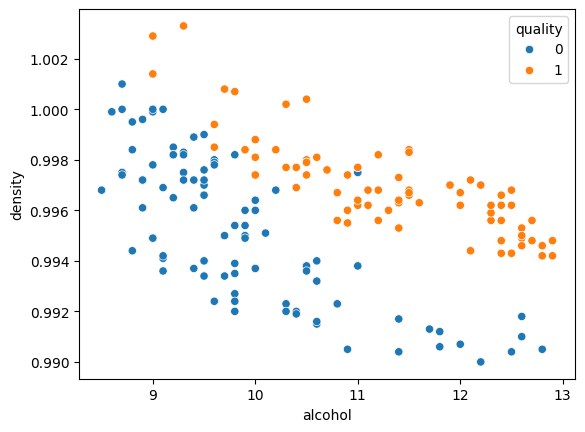

In [57]:
#visualize undersampled data

sns.scatterplot(
    data = X_undersampled,
    x = 'alcohol',
    y = 'density',
    hue = y_undersampled
)
plt.show()

In [51]:
X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=2020)

In [52]:
logreg_model_undersampled = LogisticRegression().fit(X = X_train_undersampled, y = y_train_undersampled)

In [53]:
y_pred_undersampled = logreg_model_undersampled.predict(X = X_test_undersampled)

logreg_model_undersampled_report = classification_report(
    y_true = y_test_undersampled,
    y_pred = y_pred_undersampled
)
print(logreg_model_undersampled_report)

              precision    recall  f1-score   support

           0       0.62      0.89      0.73        18
           1       0.86      0.55      0.67        22

    accuracy                           0.70        40
   macro avg       0.74      0.72      0.70        40
weighted avg       0.75      0.70      0.69        40



Oversampling

In [59]:
from imblearn.over_sampling import RandomOverSampler

In [60]:
rOs = RandomOverSampler(random_state=2020)
X_oversampled , y_oversampled = rOs.fit_resample(X, y)

In [61]:
#numerical value dari oversampled data

print(f"Jumlah data per-kelas, adalah: {y_oversampled[y_oversampled==0].count()} untuk kelas 0, dan {y_oversampled[y_oversampled==1].count()} untuk kelas 1")

Jumlah data per-kelas, adalah: 421 untuk kelas 0, dan 421 untuk kelas 1


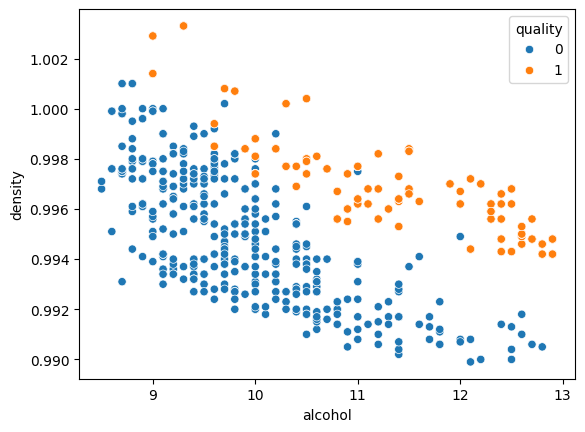

In [62]:
#visualize undersampled data

sns.scatterplot(
    data = X_oversampled,
    x = 'alcohol',
    y = 'density',
    hue = y_oversampled
)
plt.show()

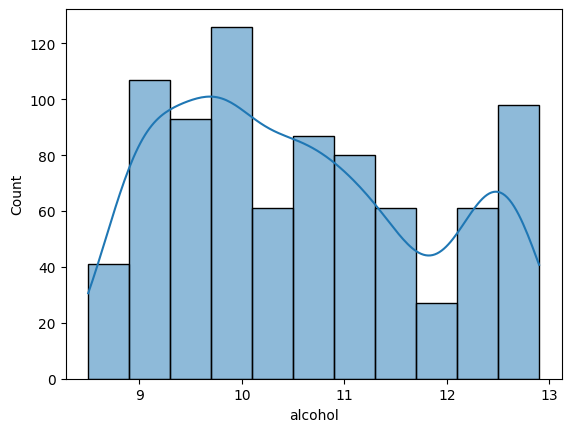

In [66]:
sns.histplot(
    data = X_oversampled,
    x = "alcohol",
    kde = True
)
plt.show()

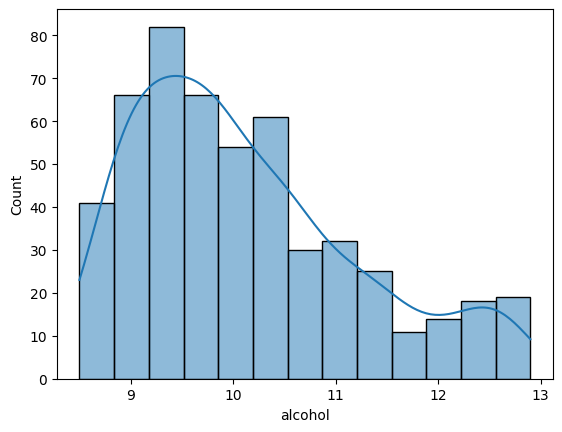

In [67]:
sns.histplot(
    data = X,
    x = "alcohol",
    kde = True
)
plt.show()

In [68]:
X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=2020)

logreg_model_oversampled = LogisticRegression().fit(X = X_train_oversampled, y = y_train_oversampled)

y_pred_oversampled = logreg_model_oversampled.predict(X = X_test_oversampled)

logreg_model_oversampled_report = classification_report(
    y_true = y_test_oversampled,
    y_pred = y_pred_oversampled
)
print(logreg_model_oversampled_report)

              precision    recall  f1-score   support

           0       0.68      0.80      0.74        82
           1       0.78      0.64      0.70        87

    accuracy                           0.72       169
   macro avg       0.73      0.72      0.72       169
weighted avg       0.73      0.72      0.72       169



In [69]:
data_classification[data_classification['quality']==1].describe()

,density,alcohol,quality
count,98.000000,98.000000,98.0
mean,0.997068,11.250000,1.0
std,0.002247,1.128383,0.0
min,0.994200,9.000000,1.0
25%,0.995525,10.425000,1.0
50%,0.996700,11.250000,1.0
75%,0.997975,12.400000,1.0
max,1.003300,12.900000,1.0


Assessment of multiple undersampling methods

In [71]:
from imblearn.under_sampling import CondensedNearestNeighbour, NeighbourhoodCleaningRule, NearMiss

undersamplers = [
    CondensedNearestNeighbour(random_state=2020), 
    NeighbourhoodCleaningRule(), 
    NearMiss()
]

for sampler in undersamplers:
    #fit terhadap data awal
    print(vars(sampler))
    
    X_undersampled, y_undersampled = sampler.fit_resample(X, y)
    X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=2020)

    logreg_model_undersampled = LogisticRegression().fit(X = X_train_undersampled, y = y_train_undersampled)

    y_pred_undersampled = logreg_model_undersampled.predict(X = X_test_undersampled)

    logreg_model_undersampled_report = classification_report(
        y_true = y_test_undersampled,
        y_pred = y_pred_undersampled
    )
    print(logreg_model_oversampled_report)

{'sampling_strategy': 'auto', 'random_state': 2020, 'n_neighbors': None, 'n_seeds_S': 1, 'n_jobs': None}
              precision    recall  f1-score   support

           0       0.68      0.80      0.74        82
           1       0.78      0.64      0.70        87

    accuracy                           0.72       169
   macro avg       0.73      0.72      0.72       169
weighted avg       0.73      0.72      0.72       169

{'sampling_strategy': 'auto', 'edited_nearest_neighbours': None, 'n_neighbors': 3, 'kind_sel': 'deprecated', 'threshold_cleaning': 0.5, 'n_jobs': None}
              precision    recall  f1-score   support

           0       0.68      0.80      0.74        82
           1       0.78      0.64      0.70        87

    accuracy                           0.72       169
   macro avg       0.73      0.72      0.72       169
weighted avg       0.73      0.72      0.72       169

{'sampling_strategy': 'auto', 'version': 1, 'n_neighbors': 3, 'n_neighbors_ver3': 3, 'n_j

Asssesment of SMOTE oversampling

In [73]:
from imblearn.over_sampling import SMOTE

X_oversampled, y_oversampled = SMOTE().fit_resample(X,y)
print(len(X_oversampled), len(y_oversampled))

X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=2020)

logreg_model_oversampled = LogisticRegression().fit(X = X_train_oversampled, y = y_train_oversampled)

y_pred_oversampled = logreg_model_oversampled.predict(X = X_test_oversampled)

logreg_model_oversampled_report = classification_report(
    y_true = y_test_oversampled,
    y_pred = y_pred_oversampled
)
print(logreg_model_oversampled_report)

842 842
              precision    recall  f1-score   support

           0       0.72      0.78      0.75        82
           1       0.78      0.71      0.74        87

    accuracy                           0.75       169
   macro avg       0.75      0.75      0.75       169
weighted avg       0.75      0.75      0.75       169



SMOTE + Class Weight Parameter

In [76]:
logreg_model_oversampled_classweighted = LogisticRegression(
    class_weight = {
        0 : 0.3,
        1 : 0.7
    }
    ).fit(X = X_train_oversampled, y = y_train_oversampled)

y_pred_oversampled = logreg_model_oversampled_classweighted.predict(X = X_test_oversampled)

logreg_model_oversampled_report = classification_report(
    y_true = y_test_oversampled,
    y_pred = y_pred_oversampled
)
print(logreg_model_oversampled_report)

              precision    recall  f1-score   support

           0       0.81      0.57      0.67        82
           1       0.68      0.87      0.77        87

    accuracy                           0.73       169
   macro avg       0.75      0.72      0.72       169
weighted avg       0.75      0.73      0.72       169



In [84]:
#class weight parameter on raw data

logreg_model_classweighted = LogisticRegression(
    class_weight = {
        0 : 0.25,
        1 : 0.75
    }
    ).fit(X = X_train, y = y_train)

y_pred = logreg_model_classweighted.predict(X = X_test)

logreg_model_report = classification_report(
    y_true = y_test,
    y_pred = y_pred
)
print(logreg_model_report)

              precision    recall  f1-score   support

           0       0.90      0.81      0.85        86
           1       0.38      0.56      0.45        18

    accuracy                           0.77       104
   macro avg       0.64      0.68      0.65       104
weighted avg       0.81      0.77      0.78       104



In [78]:
y_pred = logreg_model.predict(X = X_test)
logreg_model_report = classification_report(
    y_true = y_test,
    y_pred = y_pred
)
print(logreg_model_report)

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        86
           1       0.45      0.28      0.34        18

    accuracy                           0.82       104
   macro avg       0.66      0.60      0.62       104
weighted avg       0.79      0.82      0.80       104



Imbalanced metrics

In [85]:
from imblearn.metrics import classification_report_imbalanced

In [86]:
logreg_model_oversampled_report_imbalanced = classification_report_imbalanced(
    y_true = y_test_oversampled,
    y_pred = y_pred_oversampled
)
print(logreg_model_oversampled_report_imbalanced)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.81      0.57      0.87      0.67      0.71      0.49        82
          1       0.68      0.87      0.57      0.77      0.71      0.52        87

avg / total       0.75      0.73      0.72      0.72      0.71      0.50       169



In [ ]:
logreg_model_report = classification_report_imbalanced(
    y_true = y_test,
    y_pred = y_pred
)
print(logreg_model_report_imbalanced)